# <center>MANAGERIAL STATISTICS</center>

<img src="UVG.jpg" style="width:250px;height:250px"/>

## <center>Proyecto Final</center>
### <center>Regresión lineal múltiple</center>

En el presente análisis se busca encontar un ***modelo de regresión lineal múltiple*** para calcular la **tasa de mortalidad** de una ciudad en función de su **ingreso per cápita**, su **densidad poblacional** y la **disponibilidad de doctores y hospitales** en la misma.

El dataset a trabajar usa como referencia el libro ***Life In America's Small Cities*** de *G. Scott Thomas*, información que puede se consultada en el siguiente [link](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)

<img src="book_LIASC.jpg" style="width:250px;height:400px"/>


Empezaremos cargando las librerías que se estarán utilizando para el análisis en cuestión

In [1]:
import os
import glob
import datetime 
import numpy as np
import pandas as pd
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import statsmodels.api as sm

os.chdir("..//data/proyecto_final")

A continuación cargaremos el dataset a la variable **df**

In [2]:
df = pd.read_csv("df_salud.csv")
df.head()

,X1,X2,X3,X4,X5
0,8.0,78,284,9.1,109
1,9.3,68,433,8.7,144
2,7.5,70,739,7.2,113
3,8.9,96,1792,8.9,97
4,10.2,74,477,8.3,206


Procederemos a cambiar los encabezados para que see más facil interpretar los resultados más adelante:
* **X1:** Tasa de mortalidad (por 1000 residentes)
* **X2:** Disponibilidad de doctores (por cada 100,000 residentes)
* **X3:** Disponibilidad hospitalaria (por cada 100,000 habitantes)
* **X4:** Ingreso anual per cápita (en miles de dólares)
* **X5:** Densidad poblacional (personas por milla cuadrada)


Para simplificar los títulos, éstos se recortarán de la siguiente forma:
* X1 = **Mortalidad_x_1000_hab**
* X2 = **Doctores_x_100000_hab**
* X3 = **Hospitales_x_100000_hab**
* X4 = **Ingreso_percapita_miles_dolares**
* X5 = **Densidad_poblacional_milla2**

In [3]:
df = pd.read_csv("df_salud.csv")
df.columns = ['Mortalidad_x_1000_hab', 'Doctores_x_100000_hab', 'Hospitales_x_100000_hab', 'Ingreso_percapita_miles_dolares', 'Densidad_poblacional_milla2']
df.head()

,Mortalidad_x_1000_hab,Doctores_x_100000_hab,Hospitales_x_100000_hab,Ingreso_percapita_miles_dolares,Densidad_poblacional_milla2
0,8.0,78,284,9.1,109
1,9.3,68,433,8.7,144
2,7.5,70,739,7.2,113
3,8.9,96,1792,8.9,97
4,10.2,74,477,8.3,206


## Parte 1: Pregunta de investigación

¿Son la disponibilidad de personal médico, la disponibilidad hospitalaria, el ingreso per cápita y la densidad poblacional de una ciudad predictores útiles en la tasa de mortalidad?

## Parte 2: Análisis de datos exploratorio

* ### Gráficas

In [6]:
sns.set_style("darkgrid")

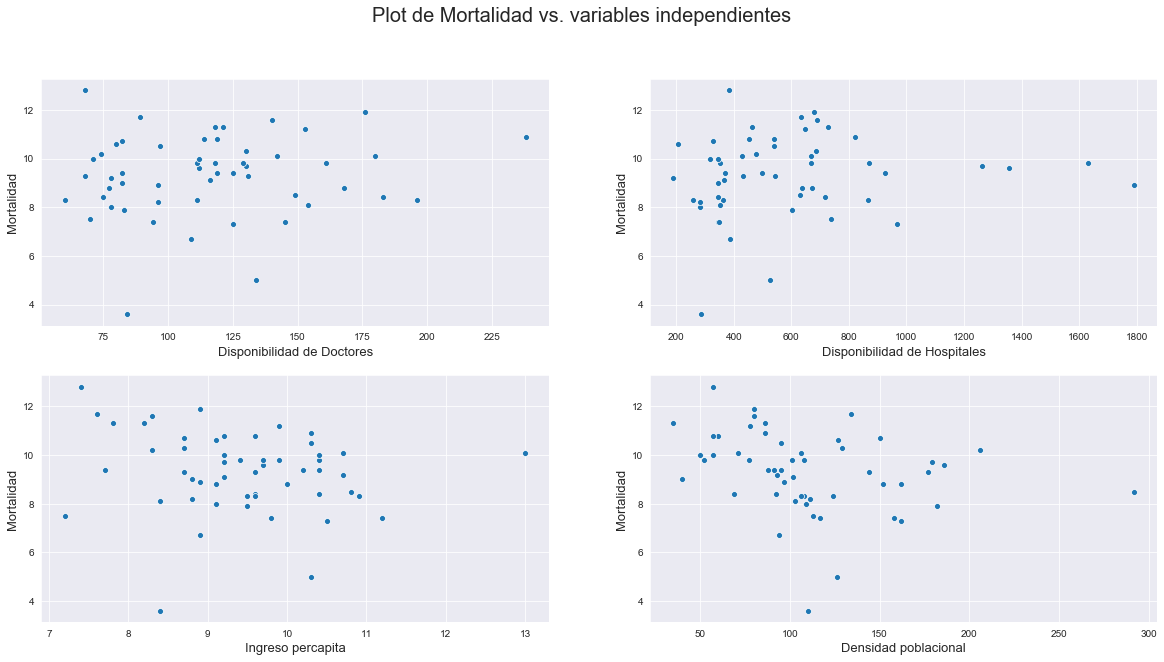

In [7]:
plt.figure(figsize = (20, 10))

ax = plt.subplot(2,2,1)
sns.scatterplot(x="Doctores_x_100000_hab", y="Mortalidad_x_1000_hab", data=df, ax= ax); 
plt.xlabel("Disponibilidad de Doctores",fontsize=13)
plt.ylabel("Mortalidad",fontsize=13)
ax = plt.subplot(2,2,2)
sns.scatterplot(x="Hospitales_x_100000_hab", y="Mortalidad_x_1000_hab", data=df, ax= ax);
plt.xlabel("Disponibilidad de Hospitales",fontsize=13)
plt.ylabel("Mortalidad",fontsize=13)
ax = plt.subplot(2,2,3)
sns.scatterplot(x="Ingreso_percapita_miles_dolares", y="Mortalidad_x_1000_hab", data=df, ax= ax);
plt.xlabel("Ingreso percapita",fontsize=13)
plt.ylabel("Mortalidad",fontsize=13)
ax = plt.subplot(2,2,4)
sns.scatterplot(x="Densidad_poblacional_milla2", y="Mortalidad_x_1000_hab", data=df, ax= ax);
plt.xlabel("Densidad poblacional",fontsize=13)
plt.ylabel("Mortalidad",fontsize=13)

plt.suptitle("Plot de Mortalidad vs. variables independientes", fontsize=20)
plt.show()

Para hacer la selección y discriminación de variables procederemos a buscar la correlación entre la variable dependiente y las propuestas de variables independientes:

In [8]:
df[["Mortalidad_x_1000_hab", "Doctores_x_100000_hab"]].corr()

,Mortalidad_x_1000_hab,Doctores_x_100000_hab
Mortalidad_x_1000_hab,1.000000,0.115765
Doctores_x_100000_hab,0.115765,1.000000


De los datos arriba estimados podemos ver que el valor **r** de nuestra variable dependiente con la cantidad de doctores por cada 100,000 habitantes es casi cero, es decir no existe correlación significante y por lo tanto no se tomará en cuenta para el modelo de regresión lineal múltiple

In [9]:
df[["Mortalidad_x_1000_hab", "Hospitales_x_100000_hab"]].corr()

,Mortalidad_x_1000_hab,Hospitales_x_100000_hab
Mortalidad_x_1000_hab,1.00000,0.11059
Hospitales_x_100000_hab,0.11059,1.00000


De los datos arriba estimados podemos ver que el valor **r** de nuestra variable dependiente con la cantidad de hospitales por cada 100,000 habitantes es casi cero, es decir no existe correlación significante y por lo tanto no se tomará en cuenta para el modelo de regresión lineal múltiple

In [10]:
df[["Mortalidad_x_1000_hab", "Ingreso_percapita_miles_dolares"]].corr()

,Mortalidad_x_1000_hab,Ingreso_percapita_miles_dolares
Mortalidad_x_1000_hab,1.000000,-0.171992
Ingreso_percapita_miles_dolares,-0.171992,1.000000


De los datos arriba estimados podemos ver que el valor **r** de nuestra variable dependiente con ingreso anual per cápita de los habitantes es casi cero, es decir no existe una correlación muy marcada pero para efectos prácticos de este ejercicio se tomará esta en cuenta por ser una de las variables con correlación mas alta.

In [11]:
df[["Mortalidad_x_1000_hab", "Densidad_poblacional_milla2"]].corr()

,Mortalidad_x_1000_hab,Densidad_poblacional_milla2
Mortalidad_x_1000_hab,1.000000,-0.277607
Densidad_poblacional_milla2,-0.277607,1.000000


De los datos arriba estimados podemos ver que el valor **r** de nuestra variable dependiente con la densidad poblacional es de -0.27, es decir que casi llega al umbral de 0.3 que se suele utilizar para decir que una variable es moderadamente correlacionada con otra. El valor negativo nos indica que la dirección de la relación es negativa.

Por ser esta la varibla con mayor valor de **r** la utilizaremos como nuestra variable principal a la hora de calcular el modelo de regresión lineal multiple.

De las gráficas superiores podemos observar que la mortalidad y las distintas variables independientes tienen relaciones con comportamientos lineales con cierto grado de disperción de datos. 

De la *primer* gráfica podemos concluir:
* Forma: aproximadamente lineal
* Dirección: ligeramente positiva
* Fuerza: debil
* Outliers: considerables

De la *segunda* gráfica podemos concluir:
* Forma: aproximadamente
* Dirección: aparentemente neutra
* Fuerza: debil
* Outliers: moderados

De la *tercer* gráfica podemos concluir:
* Forma: lineal
* Dirección: ligeramente negativa
* Fuerza: debil a moderada
* Outliers: moderados

De la *cuarta* gráfica podemos concluir:
* Forma: lineal
* Dirección: ligeramente negativa
* Fuerza: moderada
* Outliers: moderados

* ### Estadística descriptiva
Además del las gráficas descriptivas mostraremos a continuación la estadística descriptiva de las distintas variables que utilizaremos para generar el modelo de regresión lineal multiple.

Se observa que la media de la mortalidad por cada 1000 habitantes se encuentra en 9.3

In [12]:
df.describe()

,Mortalidad_x_1000_hab,Doctores_x_100000_hab,Hospitales_x_100000_hab,Ingreso_percapita_miles_dolares,Densidad_poblacional_milla2
count,53.00000,53.000000,53.000000,53.000000,53.000000
mean,9.30566,116.094340,589.792453,9.435849,110.641509
std,1.66253,37.886604,332.618305,1.075442,47.179728
min,3.60000,60.000000,190.000000,7.200000,35.000000
25%,8.30000,82.000000,353.000000,8.800000,80.000000
50%,9.40000,114.000000,525.000000,9.500000,103.000000
75%,10.30000,134.000000,686.000000,10.300000,129.000000
max,12.80000,238.000000,1792.000000,13.000000,292.000000


# Modelo: regresión lineal múltiple

A continuación calcularemos nuestro modelo de regresión, lo que nos brindará información importante dentro de la que podemos resaltar:
* Coeficientes de nuestro modelo
* Valores estimados de los parámetros de regresión
* Errores estandard
* Incertidumbre
* Entre otros

Como se había mencionado en el apartado de selección de variables, se tomará en cuenta para nuestro modelo únicamente la **densidad poblacional** y el **ingreso per cápita** debido a que son las que mayor  correlación tienen con la variable dependiente.

In [13]:
model = sm.OLS.from_formula("Mortalidad_x_1000_hab ~ Densidad_poblacional_milla2 + Ingreso_percapita_miles_dolares", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Mortalidad_x_1000_hab   R-squared:                       0.096
Model:                               OLS   Adj. R-squared:                  0.060
Method:                    Least Squares   F-statistic:                     2.653
Date:                   Sun, 17 May 2020   Prob (F-statistic):             0.0803
Time:                           20:38:57   Log-Likelihood:                -98.968
No. Observations:                     53   AIC:                             203.9
Df Residuals:                         50   BIC:                             209.8
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          12.3395      1.993      6.192      0.000       8.337      16.342
Densidad_poblacional_milla2        -0.0092      0.005     -1.916      0.061      -0.019       0.000
Ingreso_percapita_miles_dolares    -0.2142      0.210     -1.022      0.312      -0.635       0.207
==============================================================================
Omnibus:                       19.143   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.791
Skew:                          -1.233   Prob(JB):                     9.23e-07
Kurtosis:                       5.550   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El modelo para nuestra regresión es el siguiente

## <center>**Mortalidad** = 12.3395 - 0.0092 x (**Densidad_poblacional**) - 0.2142 x (**Ingreso_percapita**)</center>

Del modelo anterior podemos decir que para una densidad poblacional dada, la mortalidad por cada 1000 habitantes disminuye 0.2142 por cada mil dolares de aumento de ingreso per cápita.

Por otra parte, podemos ahora fijar el ingreso per cápita y decir que por cada unidad que aumenta la densidad poblacional por milla cuadrada en una ciudad, la mortalidad por cada 1000 habitantes disminuye 0.0092

## Visualizacion de los modelos ajustados

A continuación vamos a graficar el modelo de regresion.

Empezamos con graficar la funcion de regresion ajustada, es decir, la *mortalidad* promedio expresada como una funcion de las covariables utilizadas. Con ello se demuestra gráficamente el rol estimado de una variable cuando las otras variables se mantienen fijas, lo cual complementaremos con la respectiva gráfica de sus bandas de confianza simultaneas de 95% alrededor de estas lineas ajustadas. 

* Primer caso: como primer caso fijaremos el *ingreso per cápita* en 10 y dejaremos libre la variable de *densidad poblacional*

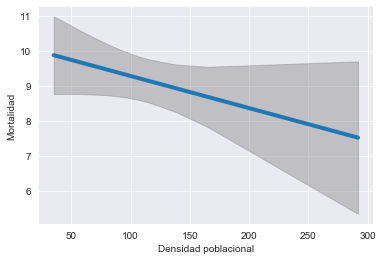

In [14]:
from statsmodels.sandbox.predict_functional import predict_functional

values = {"Ingreso_percapita_miles_dolares": 10, "Doctores_x_100000_hab":1,"Hospitales_x_100000_hab":1}
pr, cb, fv = predict_functional(
                result, "Densidad_poblacional_milla2",
                values=values, 
                ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Densidad poblacional")
_ = ax.set_ylabel("Mortalidad")

* Segundo caso: ahora fijaremos la *densidad poblacional* en 110 y dejaremos libre la variable de *ingreso per cápita*

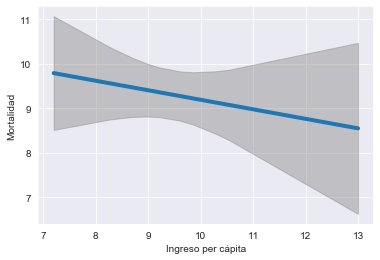

In [15]:
values = {"Densidad_poblacional_milla2": 110, "Doctores_x_100000_hab":1,"Hospitales_x_100000_hab":1}
pr, cb, fv = predict_functional(
                result, "Ingreso_percapita_miles_dolares",
                values=values, 
                ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Ingreso per cápita")
_ = ax.set_ylabel("Mortalidad")

Como se puede observar en ambas gráficas en función de la regresión ajustada, el modelo representa mejor al comportamiento real precisamente cerca de la media de la variable dependiente, es decir aproximadamente en una mortalidad de 9.3

## Predicción

Para este caso utilizaremos los siguientes valores:
* Ingreso per cápita = 9.5
* Densidad poblacional = 110

##### <center>**Mortalidad** = 12.3395 - 0.0092 x (**Densidad_poblacional**) - 0.2142 x (**Ingreso_percapita**)</center>
##### <center>**Mortalidad** = 12.3395 - 0.0092 x (**110**) - 0.2142 x (**9.5**)</center>
##### <center>**Mortalidad** = 12.3395 - 1.012 - 2.0349</center>
##### <center>**Mortalidad** = 9.2926</center>


Utilizando nuestro modelo de regresión y teniendo como inputs una *densidad poblacional* de 110 y un *ingreso per cápita* de 9.5, obtenemos que con un 95% de confianza, para una ciudad con estas características la tasa de mortalidad es en promedio **9.29**

## Conclusión

Para hacer un modelo de regresión lineal multiple se debe de tomar en cuenta la correlación entre la variable dependiente y las variables independientes que se pretenden utilizar, para luego analizar si es conveniente o no tomar en cuenta toda la información obtenida o si existen variables que es mejor discrimarla. En este caso se dispuso de cuatro variables independientes pero sólo se utilizaron dos, pues no estan correlacionadas significativamente con la variable que deseamos predecir.

Es de mucha utilidad calcular una matriz de correlación en la que se estudia la relación lineal entre cada par de predictores. Es importante tener en cuenta que, a pesar de no obtenerse ningún coeficiente de correlación alto, no está asegurado que no exista multicolinealidad.

La cantidad de muestras disponibles juega un papel importante para obtener modelos que sean capaces de brindarnos información confiable (dentro de ciertos errores estandard). Habitualmente se recomienda que **el número de observaciones sea como mínimo entre 10 y 20 veces el número de predictores del modelo**.

El hallazgo que más significativo en este análisis es que, como la mayoría de decisiones en la vida, a mayor información se tenga mejores respuestas se pueden dar. Es por ello que se observa que cerca de donde se tiene mayor concentración de muestras (información) es donde el modelo de regresión lineal devuelve los resultados más confiables.

La densidad poblacional afecta en menor grado la tasa de mortalidad, mientras que el ingreso per cápita lo impacta de manera más significativa: esto podría interpretarse como que a mayor ingreso per cápita las condiciones de vida son mejores, por lo tanto sus probabilidades de vida aumentan.